In [1]:
from sklearn import datasets
import csv
import numpy as np
boston = datasets.load_boston()
fd = boston.data
target = boston.target
names = boston.feature_names
f = open('boston_housing.csv', 'w', encoding='utf-8', newline='' "")
csv_writer = csv.writer(f)
csv_writer.writerow(np.append(names,"MEDV"))
for i in range(len(fd)):
    csv_writer.writerow(np.append(fd[i],target[i]))
f.close()

The data comes from the database in sklearn. The variable we are interested in is the relationship between housing prices and other factors. This data set is collected by Carnegie Mellon University.

In [3]:
import pandas as pd
df= pd.read_csv('./boston_housing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Data is loaded and no loss is found after data integrity is checked. No additional manipulation of rich data sets

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


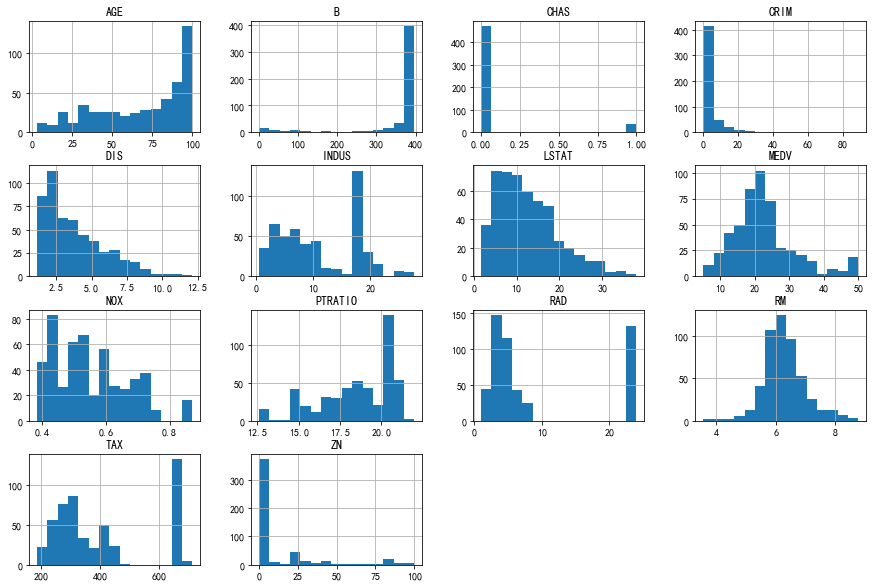

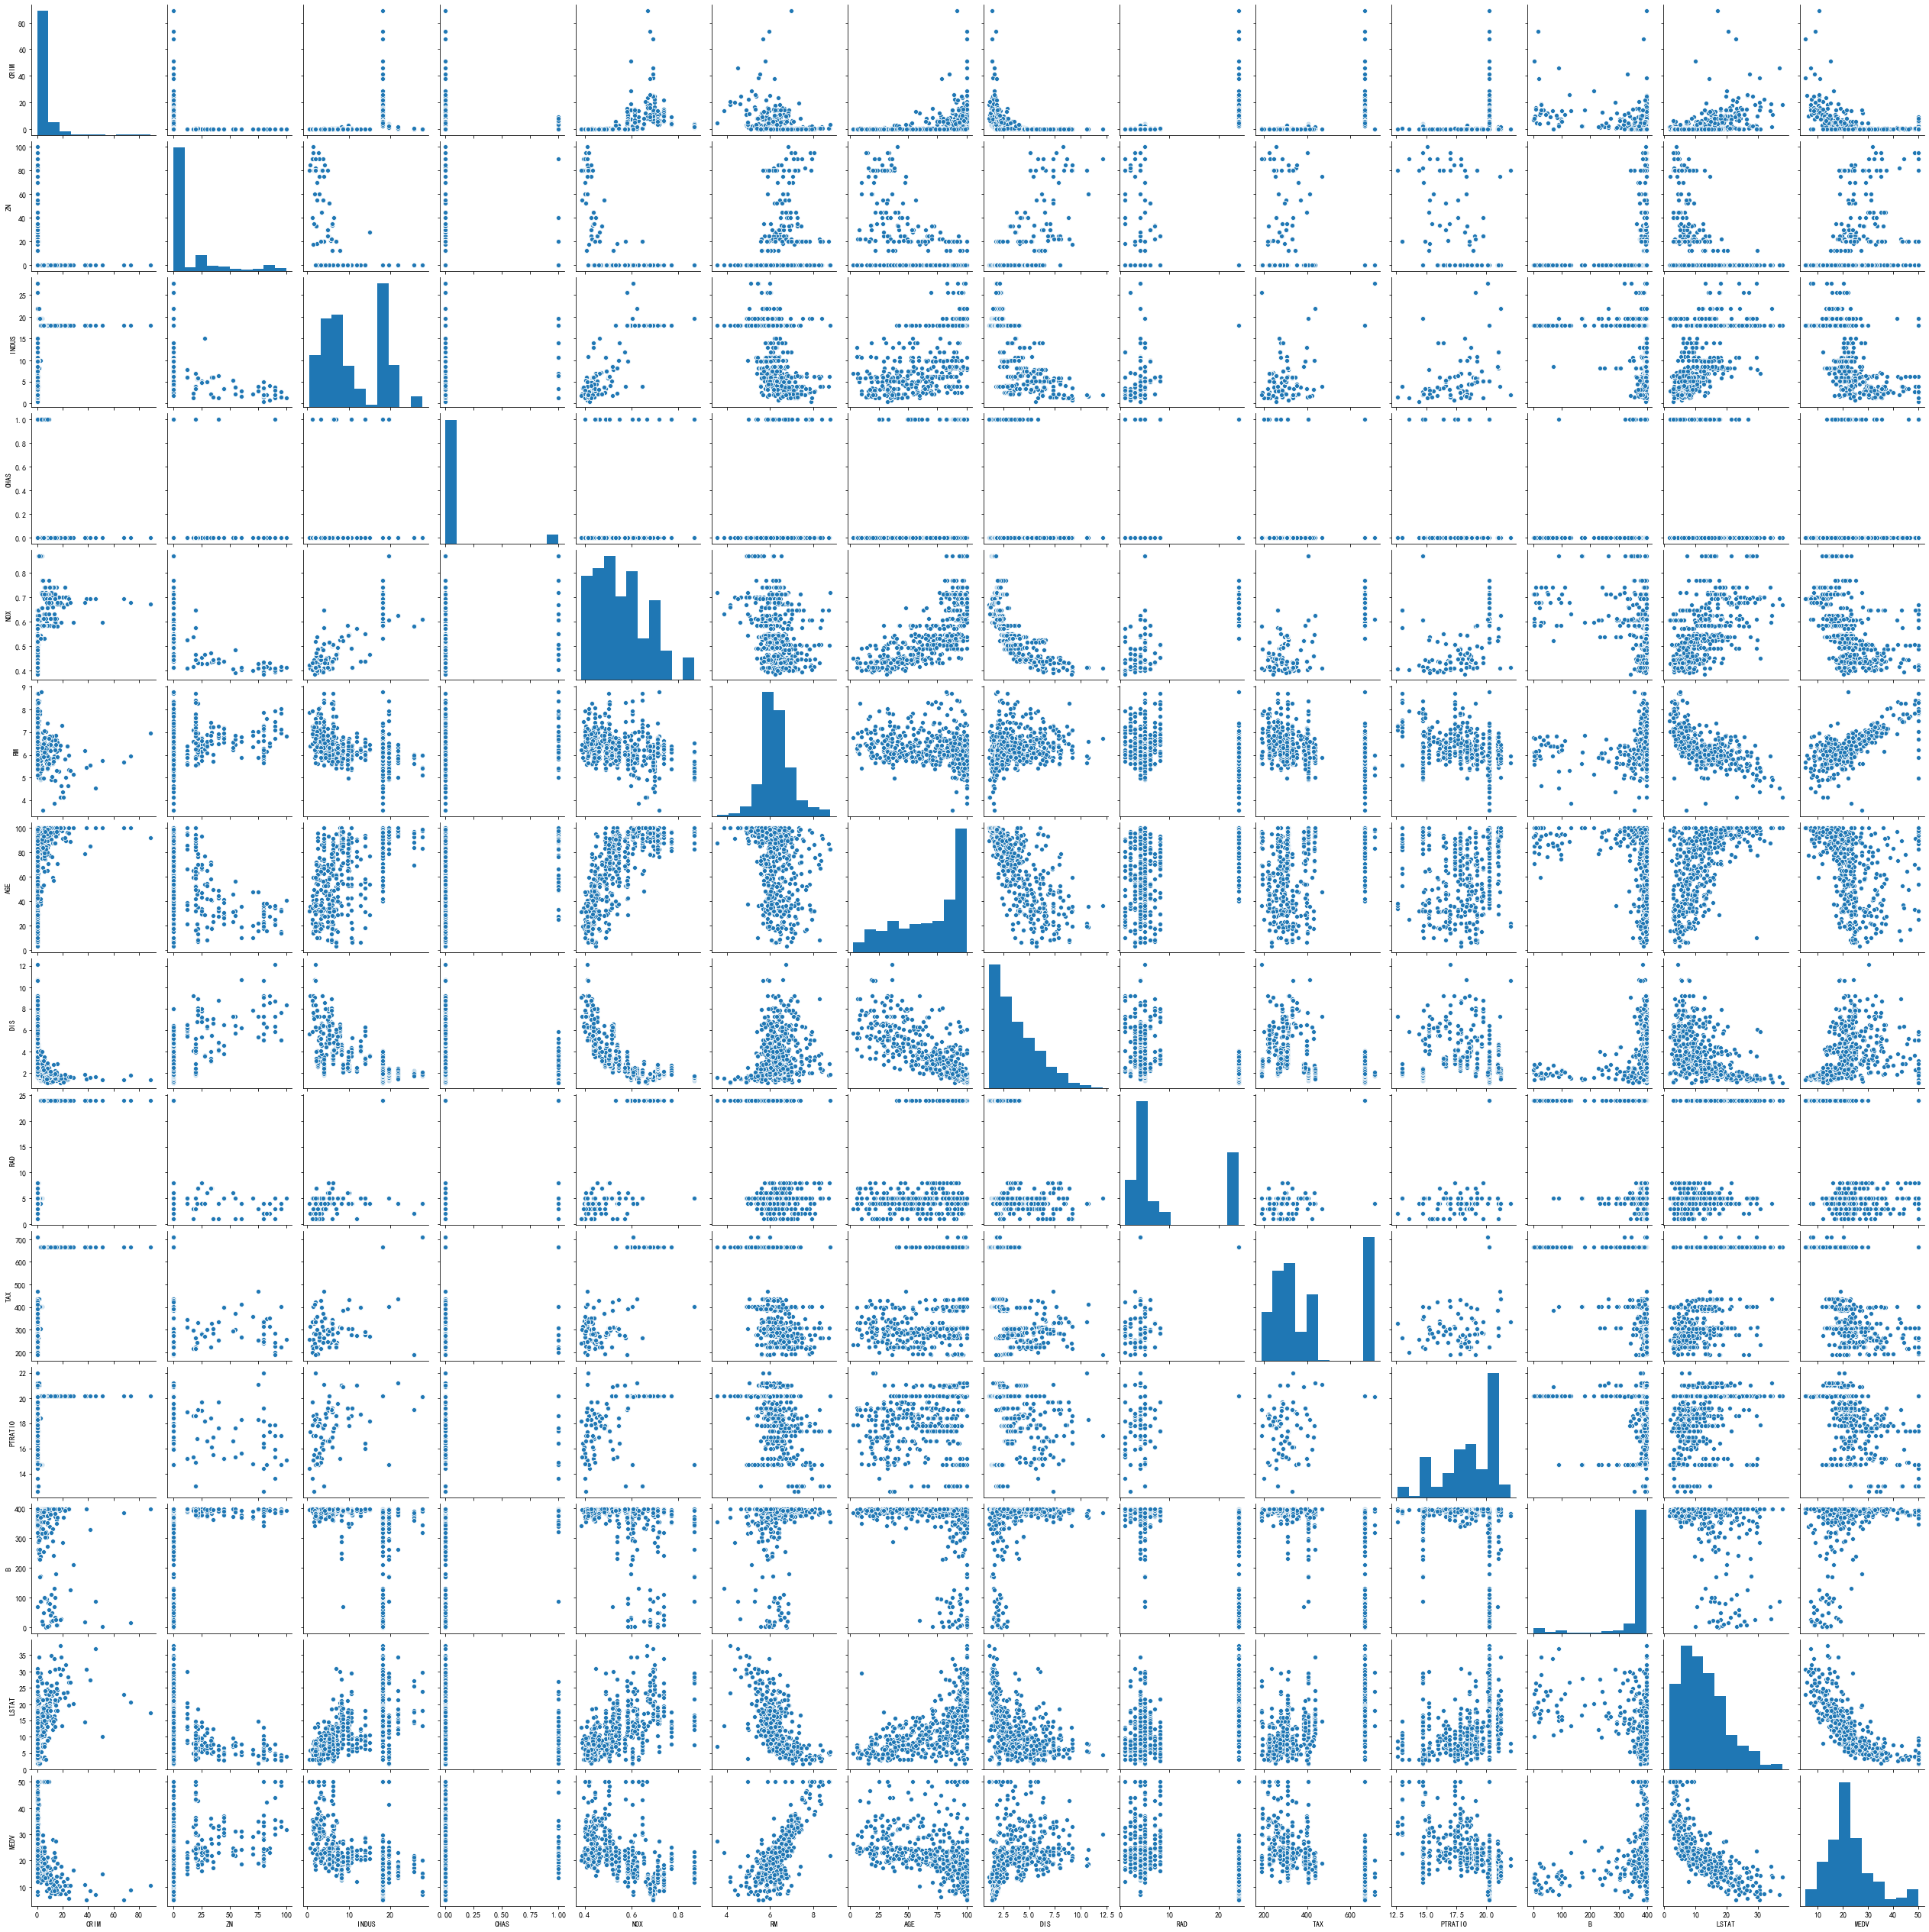

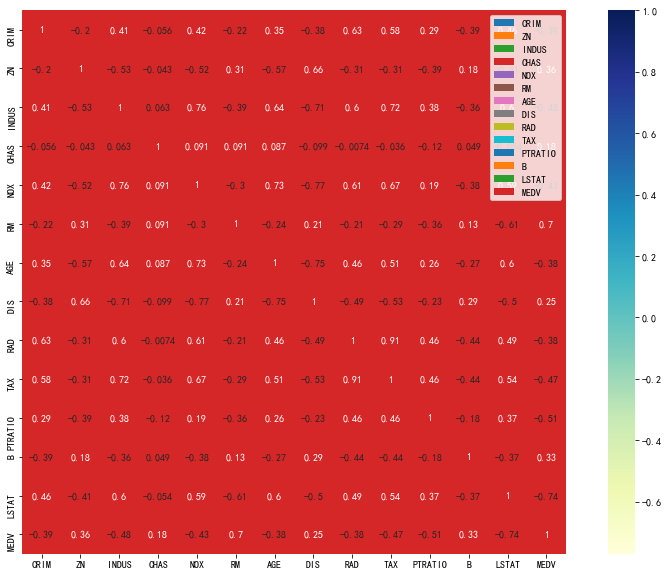

In [9]:
import sys
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use({'figure.figsize':(25,20)})

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.style.use({'figure.figsize':(15,10)})
df.hist(bins=15) 
sns.pairplot(df)
df.plot(kind='hist', bins=15)
sns.heatmap(df.corr(),square=True,annot=True,cmap='YlGnBu') 
df.describe()
df.corr()

By calculating the correlation coefficient between housing price and other factors, and drawing the histogram, scatter plot and heat map of housing price and other factors, some rules are found. There is a significant negative correlation between NOX and housing price, CHAS and RM have a positive impact on housing price, and other factors have a low impact on housing price.

In [10]:
import statsmodels.formula.api as smf
mod = smf.ols(formula='MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 04 Jan 2023   Prob (F-statistic):          6.72e-135
Time:                        16:05:02   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

Question 1: Can multiple linear regression be used to predict housing prices in Boston? How accurate is the prediction

It can be seen from the fitting results of multiple linear that the housing price can be predicted more accurately

In [13]:
correlation = df.corr()
reason = {}
factors = ["CRIM",	"ZN",	"INDUS",	"CHAS",	"NOX",	"RM",	"AGE",	"DIS",	"RAD",	"TAX",	"PTRATIO",	"B",	"LSTAT"]
for i in range(13):
    reason.update({factors[i]:correlation[factors[i]]["MEDV"]})
reason = sorted(reason.items (),key=lambda x:x[1],reverse=True)
print(reason)

[('RM', 0.6953599470715394), ('ZN', 0.3604453424505447), ('B', 0.33346081965706653), ('DIS', 0.24992873408590394), ('CHAS', 0.1752601771902975), ('AGE', -0.3769545650045959), ('RAD', -0.3816262306397776), ('CRIM', -0.3883046085868114), ('NOX', -0.42732077237328164), ('TAX', -0.46853593356776646), ('INDUS', -0.483725160028373), ('PTRATIO', -0.507786685537561), ('LSTAT', -0.7376627261740143)]


Question 2: Among all the factors that affect the housing price, which factors have a higher impact on the housing price
By calculating the correlation coefficients and sorting them, we find that the correlations are RM, ZN, BDIS, CHAS, AGE, RAD, CRIM, NOX, TAX, INDUS, PTRATIO, LSTAT

In [14]:
mod = smf.ols(formula='MEDV~CRIM+CHAS+NOX+RM+DIS+PTRATIO+LSTAT',data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     181.6
Date:                Wed, 04 Jan 2023   Prob (F-statistic):          1.10e-132
Time:                        18:39:25   Log-Likelihood:                -1519.5
No. Observations:                 506   AIC:                             3055.
Df Residuals:                     498   BIC:                             3089.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.1688      4.611      7.626      0.0

Question 3: Can the accuracy of fitting be improved if the less influential factors in linear regression are ignored?

By ignoring the factors with absolute coefficient less than 0.5, we found that the fitting effect also decreased

Summarise：
    Data analysis is based on statistical theories. Through practical case analysis, I learned that data rules in practical engineering applications are full of complexity, and how to find rules from complex data is a challenging work. It takes a lot of experience and patient trial.
    In the future, if I get data on similar topics from other data sources, I will give priority to analyze housing prices from the perspective of health, safety, comfort and convenience.